<a href="https://colab.research.google.com/github/pkRaksha/Unsupervised/blob/main/Raksha_Retail_customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

The aim of the project is to segment the online retail customers based the RFM model (Recency,Frequency and Monetory) and identify the customer groups who play a major role in increasing the profits in online retails and the rest of the customers who are still getting aquinted with online shopping . Based on this clustering we can target each group of customers and give offers,discounts and ads to improve the business in a positive way . Through exploratory analysis and model building the above insights are achieved The models used for clustering are :

K -means clustering (Silhouette, elbow method,dbscan)
Hierarchical clustering (Dendrons)

# **GitHub Link -**

https://github.com/pkRaksha/Unsupervised

# **Problem Statement**


n this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path='/content/drive/MyDrive/Pandas/Online Retail.xlsx - Online Retail.csv'
df=pd.read_csv(file_path)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df)-len(df.drop_duplicates())


5268

In [8]:
#Drop duplicates
df = df.drop_duplicates()

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

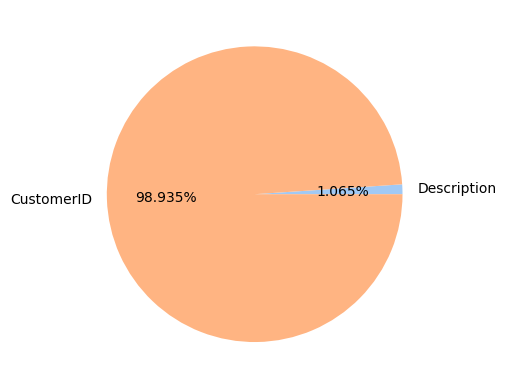

In [10]:
# Visualizing the missing values
missing_values=df.isnull().sum()
missing_values=missing_values[missing_values>0]
label=missing_values.index
count=missing_values.values
colors = sns.color_palette('pastel')
plt.pie(count, labels=label,colors = colors, autopct='%.3f%%')
plt.show()

In [11]:
# replacing  values with dummy value wherever description is not available

df['Description'].fillna(value='No description',inplace=True)


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4224
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

# New column is added to keep track of cancelled orders
def Calc_Cancelled(x):
  if x.startswith("C"):
    return -1
  else:
    return 0



In [16]:
df['order_cancelled']=df['InvoiceNo'].apply(Calc_Cancelled)

In [17]:
#Orders cancelled have a negative quantity 
df[df['order_cancelled']==-1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_cancelled
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom,-1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom,-1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom,-1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom,-1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom,-1
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom,-1
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom,-1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom,-1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom,-1


In [18]:
#The cancelled orders are removed from dataset
df_filtered=df[df['order_cancelled']==0]

In [19]:
#The negative quantity orders are removed from dataset
df_filtered=df_filtered[df_filtered['Quantity']>0]

In [20]:
df_filtered.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID         133322
Country                 0
order_cancelled         0
dtype: int64

([<matplotlib.axis.XTick at 0x7f6d319b32b0>,
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Netherlands')])

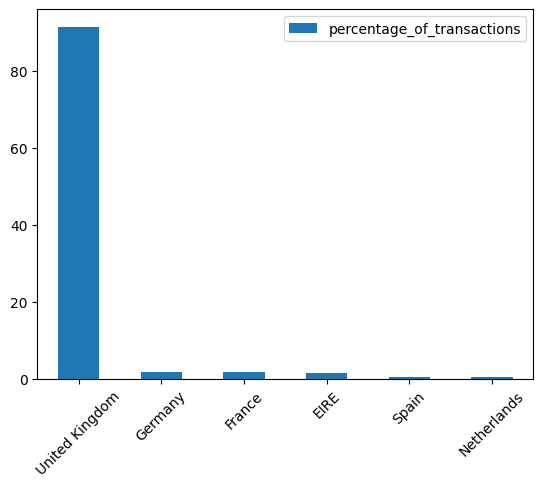

In [21]:
# Grouping by country and sorting the countries based on highest transaction number 
top_countries=df_filtered.groupby('Country')['Country'].count().sort_values(ascending=False).reset_index(name='Total_Transactions')
#The percentage distribution of transaction
top_countries['percentage_of_transactions']=(top_countries['Total_Transactions']/top_countries['Total_Transactions'].sum())*100
#Plotting a graph 
top_countries.loc[:5,['Country','percentage_of_transactions']].plot.bar()
x=[0,1,2,3,4,5]
labels=top_countries['Country'][:6]
plt.xticks(x,labels,rotation =45)

In [22]:
# Taking the subset of data since it occupies 91%
new_df=df_filtered.copy()
df_filtered=df_filtered[df_filtered['Country']=='United Kingdom']
df_filtered.drop(columns='order_cancelled',inplace=True)
df_filtered.shape


<ipython-input-22-6bf7ccb0aefe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns='order_cancelled',inplace=True)


(481143, 8)

In [23]:
df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [24]:
df_filtered['InvoiceDate'] =  pd.to_datetime(df_filtered['InvoiceDate'])

In [25]:
df_filtered['month']=df_filtered['InvoiceDate'].dt.month
df_filtered['year']=df_filtered['InvoiceDate'].dt.year
df_filtered['day_of_week']=df_filtered['InvoiceDate'].dt.dayofweek


In [26]:
# df_filtered.drop(columns='InvoiceDate',inplace=True)

In [53]:
df_filtered['Amount']=df_filtered['Quantity']*df_filtered['UnitPrice']
new_df['Amount']=new_df['Quantity']*df['UnitPrice']

### What all manipulations have you done and insights you found?

1.   There was 5268 duplicate entries dropped.
2.There are 136534
NULL values in the customerID and Description column
3.The orders that was cancelled are indicaticated with a invoice NO starting with c . Hence for all cancelled orders the customerID is NULL . Such rows are dropped
4.Thus, for 
4070 products, there are 25900 transactions in the data. This means that each product is likely to have multiple transactions in the data. There are almost as many products as customers in the data as well.
5.91% of the dataset contains transactions fron United Kingdom Hence the rest of the data are removed for simpification.
6.Split the date  column to month,year,dayofweek and dropped it





In [28]:
def plotvariable(df,variable):
  plt.figure(figsize=(8,4))
  
  plt.subplot(1,2,1)
  plt.hist(df[variable])
  plt.title("Distribution of {} ".format(variable))

  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.title("Distribution of {} ".format(variable))
  
  
  plt.show()

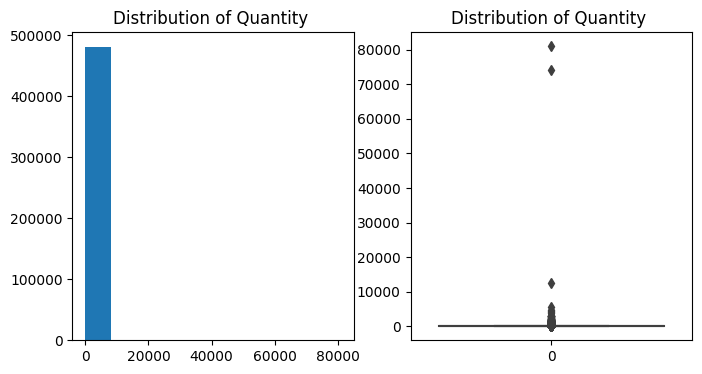

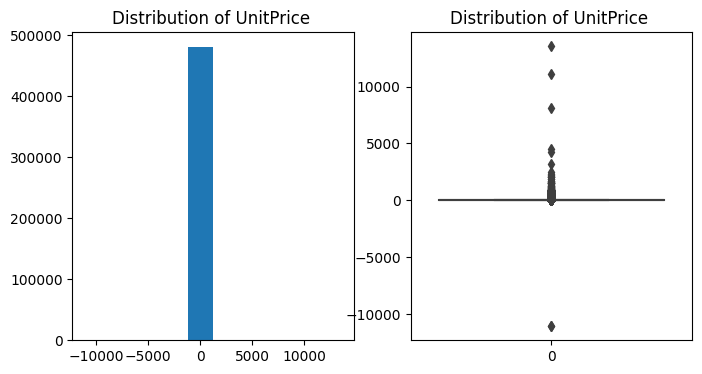

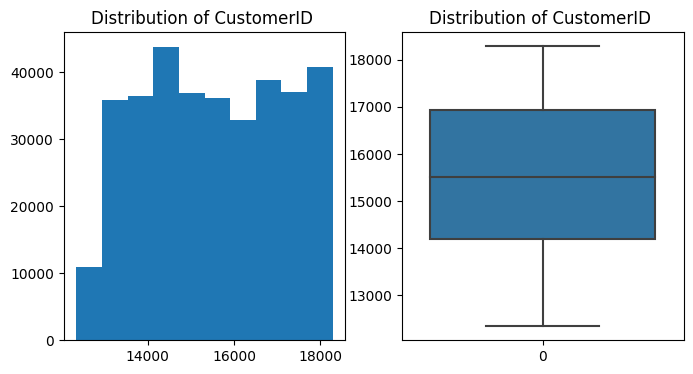

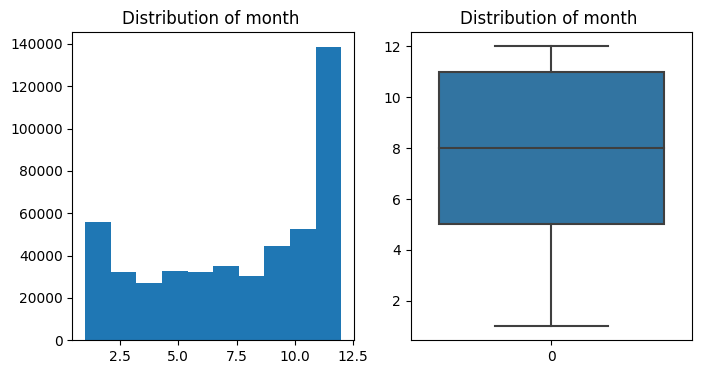

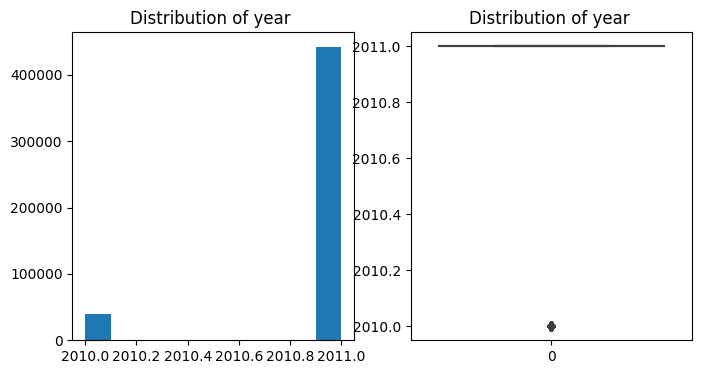

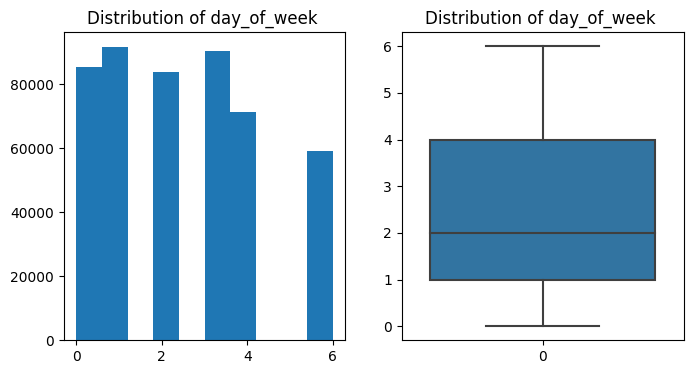

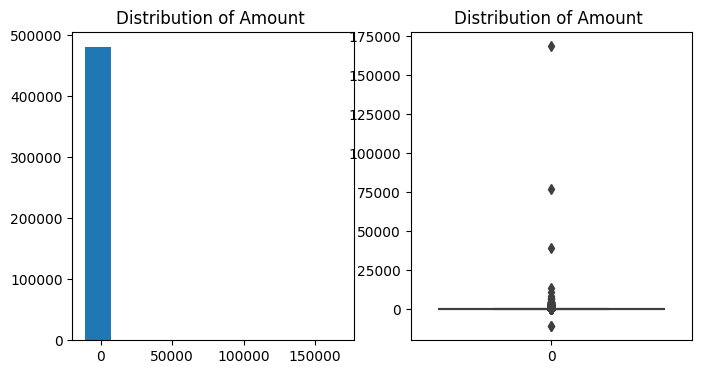

In [29]:
data=df_filtered.drop(columns=["Description","Country","StockCode","InvoiceNo","InvoiceDate"]).columns
type(data.tolist())
for variable in data.tolist():
  plotvariable(df_filtered,variable)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: title={'center': 'Month vs Sales'}, xlabel='month', ylabel='Count'>

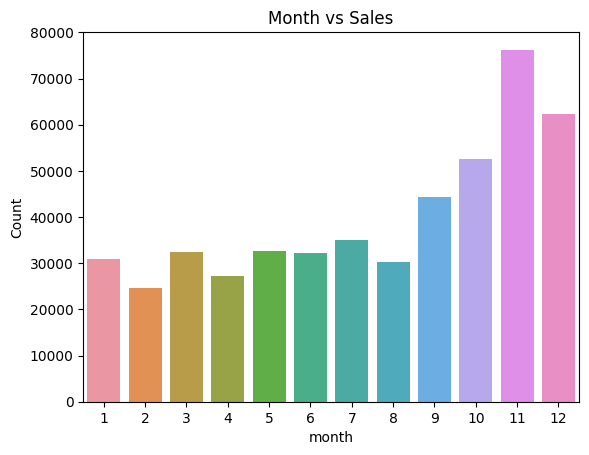

In [30]:
# Chart - 1 visualization code
#Grouping the data based on month
month_wise_sales=df_filtered.groupby('month')['month'].count().sort_values().reset_index(name='Count')
#Plotting the bargraph
plt.title("Month vs Sales")
sns.barplot(data=month_wise_sales, x="month", y="Count")

##### 1. Why did you pick the specific chart?

To display the monthly sales in quantity we use a bar chart

##### 2. What is/are the insight(s) found from the chart?

It is evident that the amount of transactions in the month of october,november and december is high due to holidays

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The sales is increased during holiday months the number of customer transacction is high leading to positive business growth

#### Chart - 2

<Axes: title={'center': 'Top 5 products'}, xlabel='StockCode', ylabel='Count'>

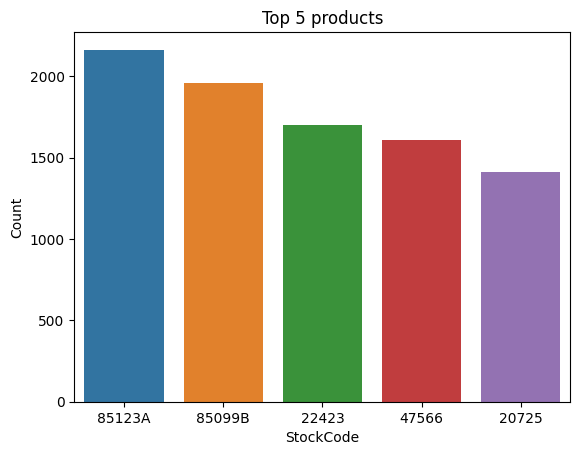

In [31]:
# Chart - 2 visualization code
#Grouping the data based on month
stock_wise_sales=df_filtered.groupby('StockCode')['StockCode'].count().sort_values(ascending=False).reset_index(name='Count')
#Plotting the bargraph
plt.title("Top 5 products")
sns.barplot(data=stock_wise_sales[:5], x="StockCode", y="Count")


##### 1. Why did you pick the specific chart?

To display the totoal number of products count we use a bar chart . The bar chart represents the quantitave data effectively

##### 2. What is/are the insight(s) found from the chart?

The chart shows that product 85123A is most ordered and preferred by customers

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart helps in finding the most preferred products to increase the revenue .

#### Chart - 3

<Axes: title={'center': 'Top 5 products based on Amount'}, xlabel='StockCode', ylabel='Total_Amount'>

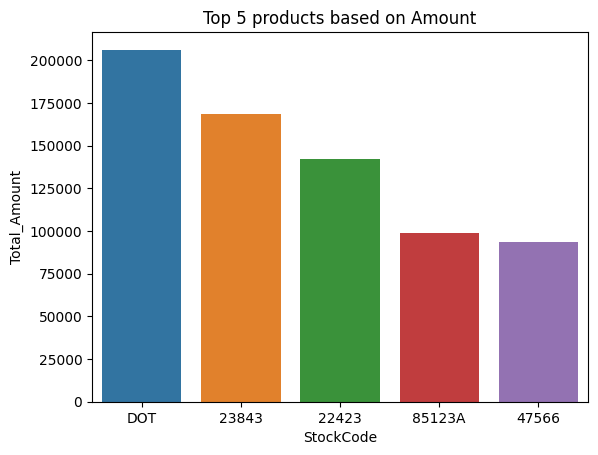

In [32]:
# Chart - 3 visualization code
amount_wise_sales=df_filtered.groupby('StockCode')['Amount'].sum().sort_values(ascending=False).reset_index(name='Total_Amount')
amount_wise_sales['%percent']=(amount_wise_sales['Total_Amount']/amount_wise_sales['Total_Amount'].sum())*100
plt.title("Top 5 products based on Amount")
sns.barplot(data=amount_wise_sales[:5], x="StockCode", y="Total_Amount")

##### 1. Why did you pick the specific chart?

This chart diplays the highest amount generated products . 

##### 2. What is/are the insight(s) found from the chart?

In the previous chart we found the most frequently ordered products The above chart shows the products which generates high totalPrice in the entire transactions

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the above chart it is clear that the revenue to the business is mostly from DOT , and other products . Based on the price per unit can be varied for higher revenue

#### Chart - 4

In [33]:
# Chart - 4 visualization
import datetime as dt
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
  
# Create the invoicemonth period column
df_filtered['InvoiceMonthYear'] = df_filtered['InvoiceDate'].apply(get_month)
df_filtered.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,day_of_week,Amount,InvoiceMonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,2010-12-01


In [34]:
grouping = df_filtered.groupby('CustomerID')['InvoiceMonthYear']
#finding and assigning earliest date of joining for each customer, here cohort refers to the time of joining
df_filtered['CohortMonthYear'] = grouping.transform('min')

In [35]:
df_filtered['InvoiceMonthYear']=pd.to_datetime(df_filtered['InvoiceMonthYear'])
df_filtered['CohortMonthYear']=pd.to_datetime(df_filtered['CohortMonthYear'])

  
invoice_year, invoice_month = df_filtered['InvoiceMonthYear'].dt.year,df_filtered['InvoiceMonthYear'].dt.month
cohort_year, cohort_month = df_filtered['CohortMonthYear'].dt.year,df_filtered['CohortMonthYear'].dt.month
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df_filtered['MonthsRetained'] = years_diff * 12 + months_diff + 1
df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,day_of_week,Amount,InvoiceMonthYear,CohortMonthYear,MonthsRetained
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2,15.30,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2,22.00,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34,2010-12-01,2010-12-01,1.0


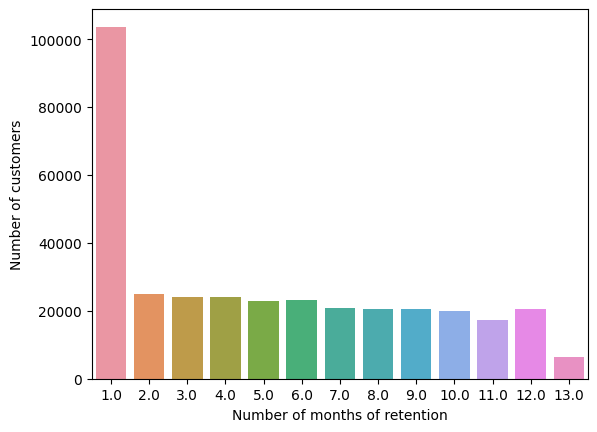

In [36]:
# Plotting a graph
sns.countplot(x=df_filtered['MonthsRetained'])
plt.xlabel("Number of months of retention")
plt.ylabel("Number of customers")
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is used to hsow the retenion of customers 

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that most customers stay one month . 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The retension rate helps the business positively Most of the customers are temporary . The number of customers stayed more than 5 months is less.

#### Chart - 5

In [37]:
# Chart - 5 visualization code
last_txn_date= df_filtered["InvoiceDate"].max()
analysis_date= last_txn_date + dt.timedelta(days = 1)


In [38]:
rfm = df_filtered.groupby("CustomerID").agg({"InvoiceNo": [lambda Frequency: Frequency.nunique()],"Amount": lambda TotalMoney: TotalMoney.sum(),"InvoiceDate": [lambda FinalOrder: (analysis_date - FinalOrder.max()).days]})
rfm = rfm.reset_index()
rfm.columns = ["customer_id", "frequency", "monetary", "recency"]
rfm.head()

,customer_id,frequency,monetary,recency
0,12346.0,1,77183.60,326
1,12747.0,11,4196.01,2
2,12748.0,210,33053.19,1
3,12749.0,5,4090.88,4
4,12820.0,4,942.34,3


In [39]:
rfm['R_score'] = rfm['recency'].rank(ascending=False)
rfm['F_score'] = rfm['frequency'].rank(ascending=False)
rfm['M_score'] = rfm['monetary'].rank(ascending=False)
 
# normalizing the rank of the customers
rfm['R_score_norm'] = (rfm['R_score']/rfm['R_score'].max())*100
rfm['F_score_norm'] = (rfm['F_score']/rfm['F_score'].max())*100
rfm['M_score_norm'] = (rfm['M_score']/rfm['M_score'].max())*100
 
# rfm.drop(columns=['R_score', 'F_score', 'M_score'], inplace=True)
rfm['Final Score']= round((rfm['R_score_norm']+rfm['F_score_norm']+rfm['M_score_norm'])/3,2)
rfm.head()
rfm['Segment']= rfm['Final Score'].apply(lambda x: 'Top Customer' if (x >=90) else ('High Value Customer' if (x >=75 and x<90) else('Medium Value Customer' if (x >=50 and x<75) else('Low Value Customer' if (x >=30 and x<50) else 'Lost Customer'))))

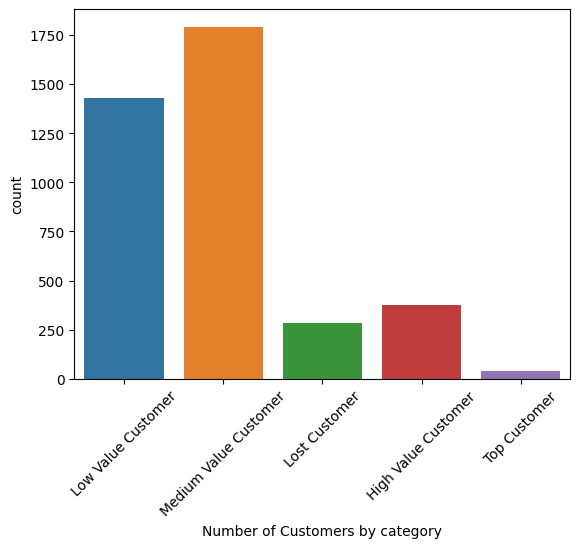

In [40]:
sns.countplot(x=rfm['Segment'])
plt.xlabel("Number of Customers by category")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The chart is used to depict customers based on the amount spent their frequency and recency of purchase .A score is calculated and customers are categorized using bar chart

##### 2. What is/are the insight(s) found from the chart?

We could see that there are high number of low value and mediam value customers . This also confirm the previous chart that the transactions with low rfm score is higher

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart helps in positive business growth . the customers are clubbed into low value and high value customers .Hence we can focus on increasing the revenue from low value customers

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To know the average transactions count:
NULL HYPOTHESIS: The amount is equal in all countries
ALTERNATE HYPOTHESIS: The amount is not equal  in all countries

#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value
first_quarter=new_df[new_df['Country']=='United Kingdom']
first_quarter=first_quarter.sample(n=29)
last_quarter=new_df[new_df['Country']!='United Kingdom']
last_quarter=last_quarter.sample(n=29)

group1=first_quarter['Amount']
group2=last_quarter['Amount']

import scipy.stats as stats

#perform the Mann-Whitney U test
stats.mannwhitneyu(group1, group2, alternative='two-sided')

MannwhitneyuResult(statistic=227.5, pvalue=0.0027518592178974763)

##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U Test:

The p value is less than 0.05 . Hence we reject the null hypothesis.

##### Why did you choose the specific statistical test?

A Mann-Whitney U test is used to compare the differences between two samples when the sample distributions are not normally distributed and the sample sizes are small (n <30).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To know if month is correlated. 
NULL HYPOTHESIS: Month is not correlatedto Amount.

ALTERNATE HYPOTHESIS :Month is correlatedto Amount

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
spearmanr(df_filtered['Amount'], df_filtered['month'])

SignificanceResult(statistic=-0.027086993948518514, pvalue=8.756029816787605e-79)

##### Which statistical test have you done to obtain P-Value?

Spearman Rank Correlation, which is used to measure the correlation between two ranked variables.

The correlation is negative and the p value supports it by rejecting the null hypothesis since it is less than 0.05

##### Why did you choose the specific statistical test?

Since amount and month are not normally distributed we choose the non parametric
correlation

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To know if month,year and pairs odf month and year have impact on Amount.

Null Hypothesis: The amount is not affected by month. The amount is not affected by year

Alternate Hypothesis:The amount is  affected by month. The amount is not affected by year

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value

import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Amount ~ C(month) + C(year) + C(month):C(year)', data=df_filtered).fit()
sm.stats.anova_lm(model, typ=2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 6
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(month),1.208188e-05,11.0,1.368149e-11,1.0
C(year),-1.042955e-05,1.0,-1.299143e-10,1.0
C(month):C(year),2.034810e+03,11.0,2.304214e-03,1.0
Residual,3.862520e+10,481130.0,NaN,NaN


##### Which statistical test have you done to obtain P-Value?

Two -Way Anova Test: The p value for month ,year and both taken into account as pairs have effect on sales . The p Value is more than 0.05 Hence the null hypothesis cannot be rejected

##### Why did you choose the specific statistical test?

A two-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups that have been split on two factors.

The purpose of a two-way ANOVA is to determine how two factors impact a response variable, and to determine whether or not there is an interaction between the two factors on the response variable.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***